In [1]:
import pandas as pd

# 1. Load emotion log file into data frame
df = pd.read_csv("emotion_logs/visit_emotions.csv")  # df stands for "DataFrame"

# preview logged data
df.head()


,patient_id,visit_label,visit_id,timestamp,total_samples,angry_count,disgust_count,fear_count,happy_count,neutral_count,sad_count,surprise_count,angry_pct,disgust_pct,fear_pct,happy_pct,neutral_pct,sad_pct,surprise_pct
0,Tony,11/27/2025,2025-11-27T10-35-27,2025-11-27T10:35:27,163,83,0,2,5,30,31,12,50.92,0,1.23,3.07,18.4,19.02,7.36
1,Tony,11/27/2025,2025-11-27T10-43-33,2025-11-27T10:43:33,100,20,0,2,24,15,33,6,20.00,0,2.00,24.00,15.0,33.00,6.00


In [2]:
# 2. Visualize a single visit

# pick latest visit for a patient
patient_id = "Tony"
visit = df[df["patient_id"] == patient_id].sort_values("timestamp").iloc[-1]

# Extract the values
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

counts = [visit[f"{emo}_count"] for emo in emotion_labels]
percents = [visit[f"{emo}_pct"] for emo in emotion_labels]


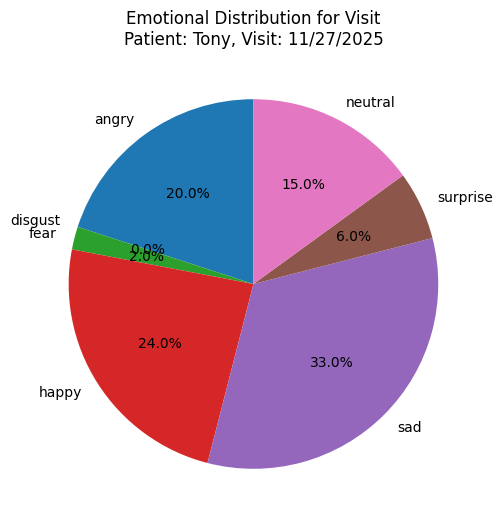

In [3]:
# Pie chart (percentage distribution)
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(
    percents,
    labels=emotion_labels,
    autopct="%1.1f%%",
    startangle=90,
)
plt.title(f"Emotional Distribution for Visit\nPatient: {patient_id}, Visit: {visit['visit_label']}")
plt.show()


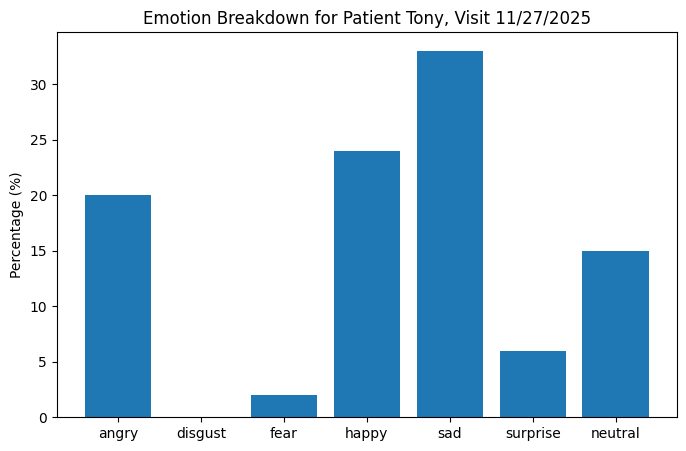

In [4]:
# Bar chart
plt.figure(figsize=(8, 5))
plt.bar(emotion_labels, percents)
plt.ylabel("Percentage (%)")
plt.title(f"Emotion Breakdown for Patient {patient_id}, Visit {visit['visit_label']}")
plt.show()


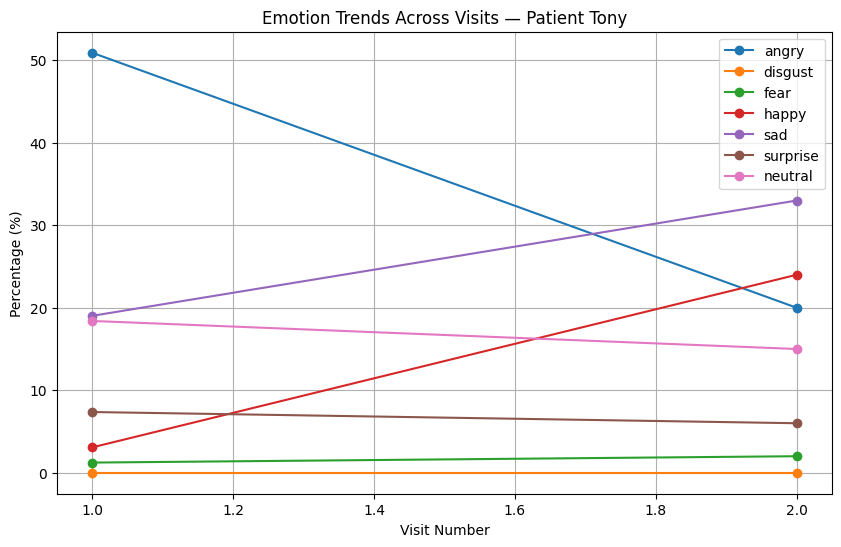

In [5]:
# 3. Serial Trend analysis (Across visit history)

# Sort visits for one patient
patient_df = df[df["patient_id"] == patient_id].sort_values("timestamp").copy()
patient_df["visit_number"] = range(1, len(patient_df) + 1)

# Plot emotion trends over visits
plt.figure(figsize=(10, 6))

for emo in emotion_labels:
    plt.plot(
        patient_df["visit_number"],
        patient_df[f"{emo}_pct"],
        marker="o",
        label=emo
    )

plt.title(f"Emotion Trends Across Visits — Patient {patient_id}")
plt.xlabel("Visit Number")
plt.ylabel("Percentage (%)")
plt.legend()
plt.grid(True)
plt.show()


In [6]:
# 4. Map a dominant emotion per visit

import numpy as np  # optional, but fine to keep

pct_cols = [f"{emo}_pct" for emo in emotion_labels]

patient_df["dominant_emotion"] = (
    patient_df[pct_cols]
    .idxmax(axis=1)
    .str.replace("_pct", "")
)

patient_df[["visit_number", "visit_label", "dominant_emotion"]]


,visit_number,visit_label,dominant_emotion
0,1,11/27/2025,angry
1,2,11/27/2025,sad
